#### minimizing the number of groups of numbers
Problem: How can you arrange given list of students by their age into groups so that we have minimum number of groups provided that within each group oldest student can be older than the youngest student at most by 2 years.

> any two numbers in any group can only differ at most by 2. So  1,2 and 3 can be a group but 1,2,3, and 4 cannot be.

naive algorithm:
    
    k = count of numbers in the array
    while k>0:
    
        combinations = combinations(list,k) 
        
        for combination in combinations:
       
            if max(combination) - min(combination)<3:
                record that combination
                pop combination from the list
        k-=1
       
    return combination record
    
#### Example
    
    1,2,3,4
    combinations for first group  with 4 elements
    1,2,3,4
    combinations for first group with 3 elements
    (1,2,3), (4)
    (1,2,4), (3)
    (1,3,4), (2)
    (2,3,4), (1)
    combinations for first group with 2 elements
    (1,2), (3,4)
    (1,2), (3),(4)
    (1,3), (2,4)
    (1,3), (2),(4)
    (1,4), (2,3)
    (1,4), (2),(3)

In [100]:
import itertools 
import numpy as np
from collections import defaultdict

#### Naive Algorithm: 
> takes into account all the combinations and permutations

In [101]:
def getAllSubsets(list_):
    '''
    Calculates all posible group arrangements for a given list. 
    args:
        list_ (list): list of input numbers to arranged into groups 
    return:
        subsets(list): list of all groups that can be constructed using the elements of the input list_
    '''
    subsets = []
    for m in range(0, len(list_)+1):
        for subset in itertools.combinations(list_, m): # combinations of the elements within the list having m elements per group
            if len(subset)>0:
                if max(subset)-min(subset)<=2: # checks if any subset elements differ more than 2 if not so add into subsets
                    subsets.append(subset)
    return subsets

def getPotentialGroups(subsets,index_):
    '''
    For a given pair in the subset, collects subsets that do not contain any element of the given subset.
    args:
        subsets(list)
        index_(int)
    return:
        potential_groups(list)
    '''
    queue = subsets.copy()
    current_group = queue[index_] 
    queue.remove(current_group)
    potential_groups = queue.copy()
    for element in current_group:
        for group in queue:
            #print(group)
            if element in group:
                try:
                    potential_groups.remove(group)
                except Exception as e:
                    #print(e)
                    pass
    potential_groups.append(current_group)
    return potential_groups

def checkEligibility(list_, potential_groups, number_of_groups):
    '''
    creates combinations from the given potential_groups list for length of given number of groups.
    Ex: It will create 2 things first given that list_ = [1,2,3,4]:
        permutations of the list for 4 elements: 1234, 1243, 1324, 1342 ... etc these are numeric sequences that contains all the
        elements of the list. Any solution to this problem can be represented as one of these sequences. In short any solution
        should contain every element in the given list and only one time.
        Secondly it will create a permutation list from the potential groups.
        IF potential groups = [((1,2),(3,4)),((1,3),(2,4))] which contains 2 elements then it will first create
    permutation integers such as:
        1234, 1324 
        Check if 2 is in 1 so that we make sure to keep potential groups that contain all the elements of the list without repetition.
    args:
        list_ (list)
        potential_groups(list)
        number_of_groups(int): checks the eligibility for the permutations of number of groups 
    return:
        combs(list): combinations that meet permutation criteria
    '''
    # permutations potential groups that contains all the items in the given list
    # joins the list into a string, removes everything but numbers, converts them into integers
    combs = []
    perms = [int(''.join(str(perm)).replace(' ','').replace(',','').replace(')','').replace('(','')) for perm in itertools.permutations(list_,len(list_))]
    for comb in itertools.combinations(potential_groups, number_of_groups):
        #print(comb)
        if int(''.join(str(comb)).replace(' ','').replace(',','').replace(')','').replace('(','') ) in perms:
            #print('eligible combination ',comb)
            combs.append(comb)
    return combs

def getAllCombinations(list_):
    '''
    args:
        list_(list)
    return:
        results(defaultdict): result dictionary containing combinations, and number of groups required
    '''
    results = defaultdict(list)
    subsets = getAllSubsets(list_)
    #print(subsets)
    index_=0
    for index_ in range(len(subsets)):
        potential_groups = getPotentialGroups(subsets,index_)
        number_of_groups = 1
        while number_of_groups<=len(list_):
            group = checkEligibility(list_, potential_groups, number_of_groups)
            if len(group)>0:
                results[subsets[index_],number_of_groups] = group
            number_of_groups+=1
    return results

def organizeResults(list_,results):
    '''
    Organizes the results dictionary for easy access to number of groups and combinations 
    args:
        list_(list)
        results(defaultdict)
    return:
        org_results(dict)
    
    '''
    org_results = {}
    for n in range(len(list_)):
        temp_results = []
        for m in results.keys():
            if n == m[1]:
                for result in results[m]:
                    temp_results.append(result)
        if len(temp_results)>0:
            org_results[n] = temp_results
    return org_results

def getMinNumberOfGroups(org_results):
    '''
    args:
        org_results(dict)
    return:
        int
    '''
    return min([key for key in org_results.keys()])

def getCombsForMinNumberOfGroups(org_results,min_number_of_groups):
    '''
    args:
        org_results(dict)
        min_number_of_groups(int)
    return:
        list : slice of the org_results dictionary for the minimum number of groups that meets the problem solution
    '''
    return org_results[min_number_of_groups]

In [102]:
# example we have students with ages of 1,2,3,4: then what is the minimum arrangement 
list_ = [1,2,3,5,14]
combinations = getAllCombinations(list_)
#print('combinations')
#print(combinations)
org_results = organizeResults(list_,combinations)
minNumberOfGroupsRequired = getMinNumberOfGroups(org_results)
print('------')
print(minNumberOfGroupsRequired)
print('--- Valid Arrangements ---- ')
getCombsForMinNumberOfGroups(org_results,minNumberOfGroupsRequired)

------
3
--- Valid Arrangements ---- 


[((14,), (1, 2, 3), (5,)),
 ((5,), (1, 2, 3), (14,)),
 ((1, 2), (3, 5), (14,)),
 ((14,), (3, 5), (1, 2)),
 ((14,), (1, 2), (3, 5)),
 ((5,), (14,), (1, 2, 3))]

### greedy algorithm

    
    sort the list asc
    1. add first element into first group
    2. add next elements one by one into first group if max-min<=2
    3. else record first group and pop elements from the list
    4. repeat 1,2,3 
    

In [103]:
def addRemove(sorted_list,group):
    '''
    args:
        sorted_list(list)
    return:
        group(list)
    '''
    group.append(sorted_list[0])
    sorted_list.pop(0)
    return sorted_list, group

def getMinGroups(sorted_list,group_number=0,groups={}): 
    '''
    args:
        sorted_list(list)
        group_number(int)
        groups(dict)
    return:
        groups(dict)
    '''
    group = []
    max_ = 0
    min_ = 0
    while max_ - min_ <=2:
        if len(sorted_list)>0:
            #print(max_ - min_)
            sorted_list,group = addRemove(sorted_list,group)
            #print(group,sorted_list)
            if len(sorted_list)>0:
                min_ = group[0]
                max_ = sorted_list[0]
        else:
            break
    groups[group_number] = group
    group_number +=1
    if len(sorted_list)>0:
        getMinGroups(sorted_list,group_number,groups)
   
    return groups

def getMinNumOfGroups(groups):
    return(len(groups.keys()))

In [104]:
#example 1,2,3,5,14
list_ = [1,2,3,5,14]
sorted_list = sorted(list_)
len(sorted_list)
groups = getMinGroups(sorted_list,group_number=0,groups={})
print(groups)
print(getMinNumOfGroups(groups))

{0: [1, 2, 3], 1: [5], 2: [14]}
3


Performances

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
from time import time
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
def plotPerformance(performance,algoName,title):
    try:
        bs = pd.DataFrame(performance)
        bs.columns=['input_size','mseconds']
        fig, ax = plt.subplots()
        _=ax.set_title(title)
        _=ax.plot(bs.input_size,bs['mseconds'],label=algoName,color='blue')
        _=ax.legend()
        _=ax.grid()
        _=ax.set_xlabel('input size')
        _=ax.set_ylabel('mili seconds')
        return True
    except Exception as e:
        print(e)
        return False

In [106]:
performance=[]
for k in range(10000):
    list_ = list(np.random.random_integers(1,13,k))
    t0 = time()*1000 # miliseconds
    groups = getMinGroups(sorted_list,group_number=0,groups={})
    t1 = time()*1000 # miliseconds
    t_delta = (t1-t0)
    k +=1
    performance.append((k,t_delta))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


True

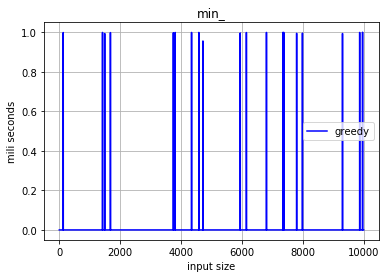

In [107]:
plotPerformance(performance,'greedy','min_')

In [120]:
performance=[]
for k in range(6):
    list_ = list(np.random.random_integers(1,13,k+2))
    print(list_)
    t0 = time()*1000 # miliseconds
    combinations = getAllCombinations(list_)
    org_results = organizeResults(list_,combinations)
    t1 = time()*1000 # miliseconds
    t_delta = (t1-t0)
    k +=1
    performance.append((k,t_delta))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


[4, 11]
[4, 4, 5]
[12, 1, 2, 1]
[7, 1, 2, 10, 11]
[11, 9, 12, 1, 11, 8]
[10, 10, 1, 11, 6, 4, 8]


True

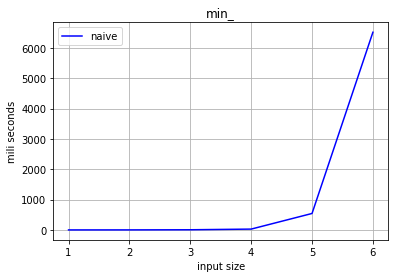

In [122]:
plotPerformance(performance,'naive','min_')